In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [44]:
sal = pd.read_csv('/content/drive/MyDrive/Github_project_time/Salary Data.csv')
sal.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
sal.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [ ]:
sal.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
sal.shape

(375, 6)

In [ ]:
sal.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
sal.Age.mean()

37.43163538873995

In [63]:
sal['Age'] = sal['Age'].fillna(sal['Age'].mean())

In [64]:
sal['Age'].isna().sum()

0

In [ ]:
sal['Age'].dtype

dtype('float64')

In [65]:
sal['Gender'].value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [66]:
sal['Gender']=sal['Gender'].fillna('Male')

In [67]:
sal['Gender'].isna().sum()

0

In [ ]:
sal['Gender'].dtype

dtype('O')

In [47]:
sal['Education Level']=sal['Education Level'].fillna("Bachelor's")

In [49]:
sal['Education Level'].isna().sum()

0

In [53]:
sal['Job Title']=sal['Job Title'].fillna('Director of Marketing')

In [55]:
sal['Job Title'].value_counts()

Director of Marketing              14
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [54]:
sal['Job Title'].isna().sum()

0

In [57]:
sal['Years of Experience']=sal['Years of Experience'].fillna(sal['Years of Experience'].mean())

In [59]:
sal['Years of Experience'].isna().sum()

0

In [60]:
sal['Salary'] = sal['Salary'].fillna(sal['Salary'].mean())

In [61]:
sal['Salary'].isna().sum()

0

In [68]:
sal.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [69]:
sal.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [71]:
sal['Age'].unique()

array([32.        , 28.        , 45.        , 36.        , 52.        ,
       29.        , 42.        , 31.        , 26.        , 38.        ,
       48.        , 35.        , 40.        , 27.        , 44.        ,
       33.        , 39.        , 25.        , 51.        , 34.        ,
       47.        , 30.        , 41.        , 37.        , 24.        ,
       43.        , 50.        , 46.        , 49.        , 23.        ,
       53.        , 37.43163539])

number of Male : 196
number of Female : 179

% of Male  52.27 %
% of female  47.73 %


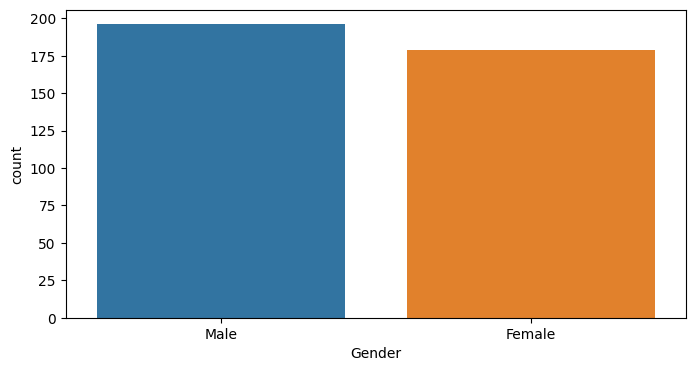

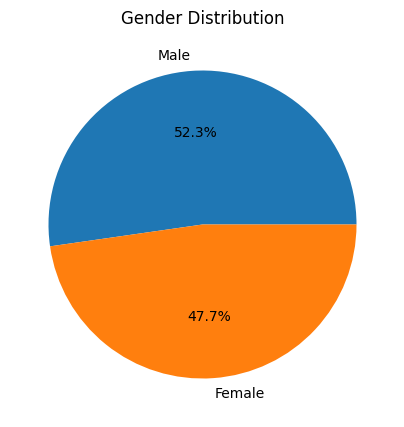

In [81]:
plt.figure(figsize=(8,4))
sns.countplot(data= sal,x=sal['Gender'])
Male,Female = sal['Gender'].value_counts()
print('number of Male :',Male)
print('number of Female :',Female)
print('')
print('% of Male ',round(Male/len(sal)*100,2),'%')
print('% of female ',round(Female/len(sal)*100,2),'%')

plt.figure(figsize=(5, 5))
plt.pie([Male, Female], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

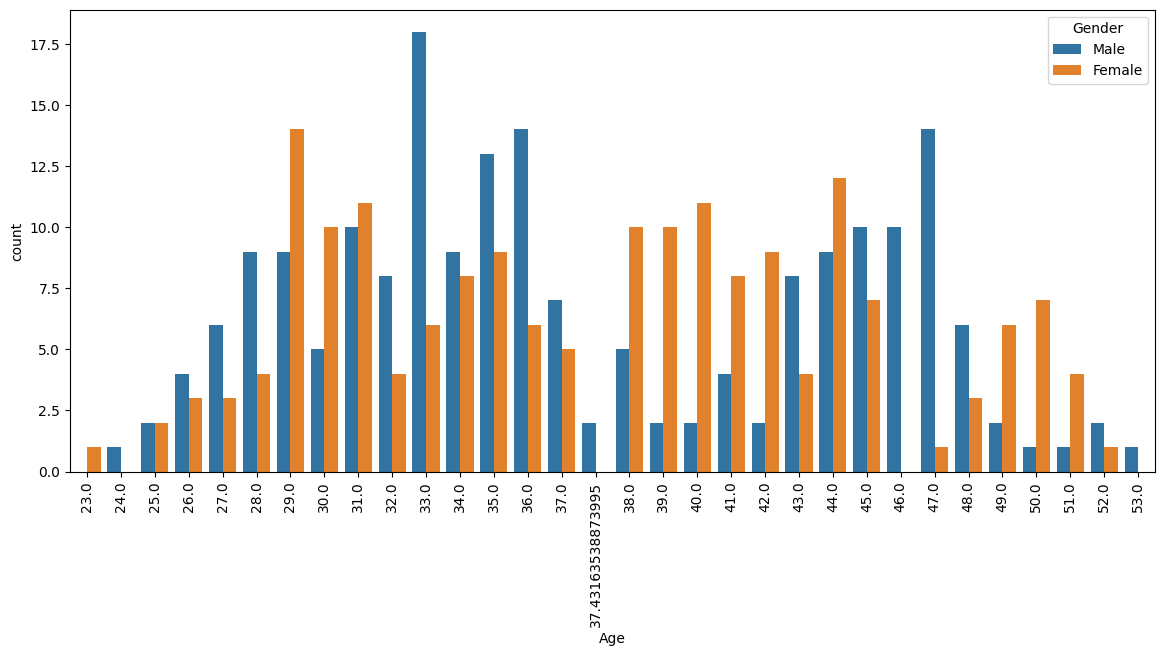

In [74]:
plt.figure(figsize=(14,6))
sns.countplot(data=sal,x='Age',hue='Gender')
plt.xticks(rotation=90)
plt.show()

In [75]:
sal['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

number of Bachelors : 226
number of Masters : 98
number of Phd : 51

% of Bachelors  60.267 %
% of Masters  26.133 %
% of PhD  13.6 %


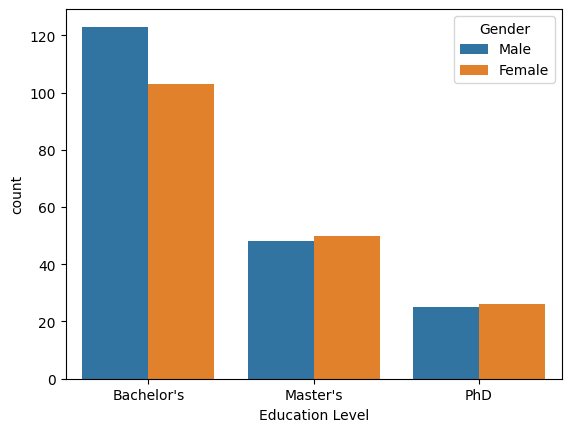

In [77]:
sns.countplot(data=sal,x='Education Level',hue='Gender')
Bachelors, Masters, PhD = sal['Education Level'].value_counts()
print('number of Bachelors :',Bachelors)
print('number of Masters :',Masters)
print('number of Phd :',PhD)
print('')
print('% of Bachelors ',round(Bachelors / len(sal)*100,3),'%')
print('% of Masters ',round(Masters / len(sal)*100,3),'%')
print('% of PhD ',round(PhD / len(sal)*100,3),'%')

In [78]:
sal['Years of Experience'].unique()

array([ 5.       ,  3.       , 15.       ,  7.       , 20.       ,
        2.       , 12.       ,  4.       ,  1.       , 10.       ,
       18.       ,  6.       , 14.       , 16.       ,  0.       ,
       22.       , 19.       ,  9.       , 13.       , 11.       ,
       25.       , 21.       ,  8.       , 17.       , 23.       ,
       24.       ,  0.5      ,  1.5      , 10.0308311])

In [79]:
sal['Salary'].unique()

array([ 90000.       ,  65000.       , 150000.       ,  60000.       ,
       200000.       ,  55000.       , 120000.       ,  80000.       ,
        45000.       , 110000.       ,  75000.       , 140000.       ,
       130000.       ,  40000.       , 125000.       , 115000.       ,
        35000.       , 180000.       , 190000.       ,  50000.       ,
       250000.       , 170000.       , 160000.       ,  85000.       ,
        95000.       , 105000.       ,  70000.       , 100000.       ,
        30000.       , 135000.       , 220000.       , 175000.       ,
       185000.       , 100577.3458445, 145000.       , 155000.       ,
          350.       ])

In [133]:
data = pd.get_dummies(sal, columns=["Gender", "Education Level"])

# Display the modified DataFrame
print(data.head())

    Age          Job Title  Years of Experience    Salary  Gender_Female  \
0  32.0  Software Engineer                  5.0   90000.0              0   
1  28.0       Data Analyst                  3.0   65000.0              1   
2  45.0     Senior Manager                 15.0  150000.0              0   
3  36.0    Sales Associate                  7.0   60000.0              1   
4  52.0           Director                 20.0  200000.0              0   

   Gender_Male  Education Level_Bachelor's  Education Level_Master's  \
0            1                           1                         0   
1            0                           0                         1   
2            1                           0                         0   
3            0                           1                         0   
4            1                           0                         1   

   Education Level_PhD  
0                    0  
1                    0  
2                    1  
3         

In [135]:
data

,Age,Job Title,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,Software Engineer,5.0,90000.0,0,1,1,0,0
1,28.0,Data Analyst,3.0,65000.0,1,0,0,1,0
2,45.0,Senior Manager,15.0,150000.0,0,1,0,0,1
3,36.0,Sales Associate,7.0,60000.0,1,0,1,0,0
4,52.0,Director,20.0,200000.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
370,35.0,Senior Marketing Analyst,8.0,85000.0,1,0,1,0,0
371,43.0,Director of Operations,19.0,170000.0,0,1,0,1,0
372,29.0,Junior Project Manager,2.0,40000.0,1,0,1,0,0
373,34.0,Senior Operations Coordinator,7.0,90000.0,0,1,1,0,0


In [139]:
data.drop('Job Title',axis=1,inplace=True)

In [140]:
data.head()

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,5.0,90000.0,0,1,1,0,0
1,28.0,3.0,65000.0,1,0,0,1,0
2,45.0,15.0,150000.0,0,1,0,0,1
3,36.0,7.0,60000.0,1,0,1,0,0
4,52.0,20.0,200000.0,0,1,0,1,0


<Figure size 1400x500 with 0 Axes>

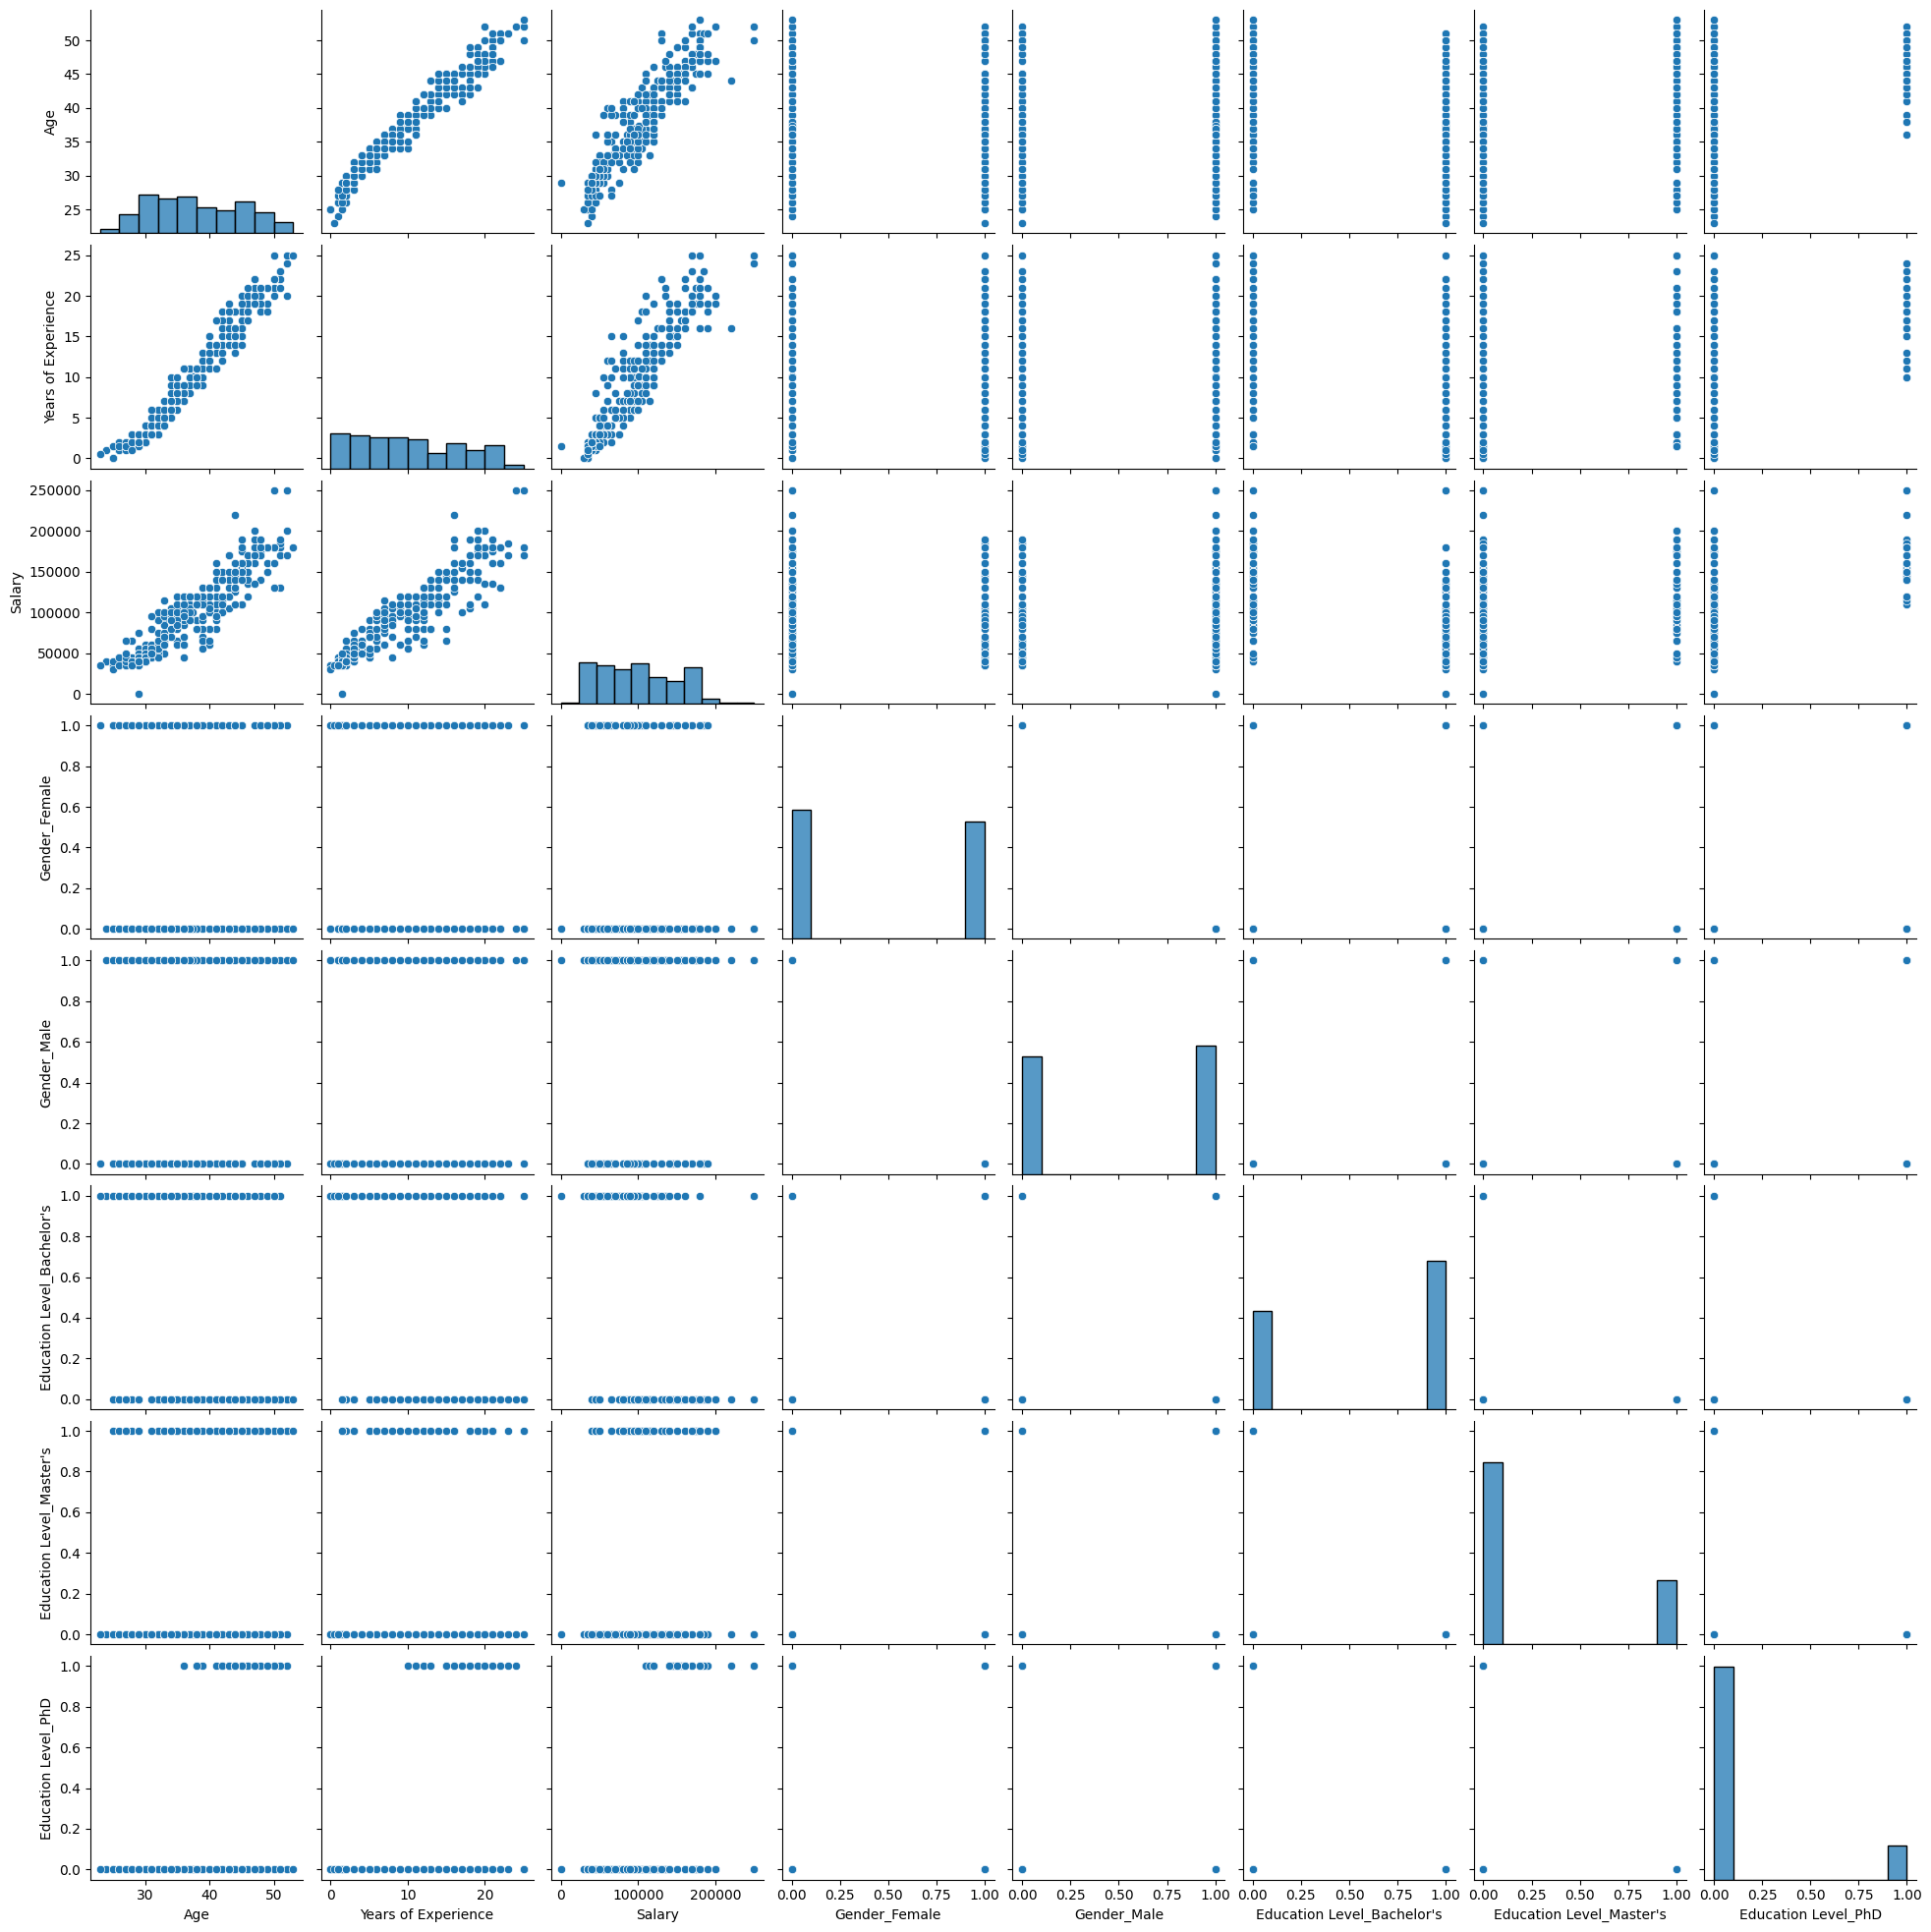

In [141]:
plt.figure(figsize=(14,5))
sns.pairplot(data)

<Axes: >

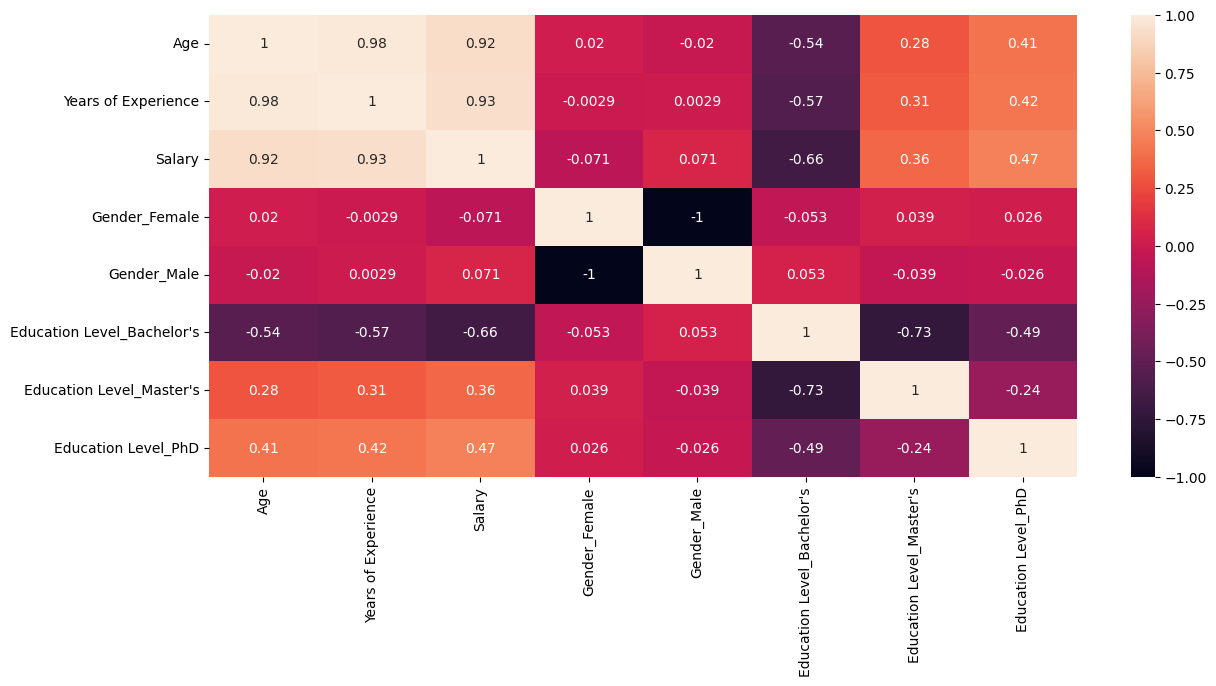

In [142]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True)

In [143]:
X = data.drop('Salary',axis=1)
X.head()

,Age,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,1,1,0,0
1,28.0,3.0,1,0,0,1,0
2,45.0,15.0,0,1,0,0,1
3,36.0,7.0,1,0,1,0,0
4,52.0,20.0,0,1,0,1,0


In [144]:
y = data.Salary
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [146]:
model = LinearRegression()

In [147]:
model.fit(X_train,y_train)

LinearRegression()

In [148]:
len(X_train),len(X_test)

(300, 75)

In [149]:
len(y_train),len(y_test)

(300, 75)

In [150]:
y_pred=model.predict(X_test)

In [151]:
model.score(X_test,y_test)*100

90.20308607989028

In [152]:
model.score(X_train,y_train)*100

90.1906396225393

In [153]:
y_pred[:2]

array([168740.39000332,  92895.25779905])

In [154]:
test = pd.DataFrame(X_test)
test[:2]

,Age,Years of Experience,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
167,46.0,18.0,0,1,0,0,1
33,39.0,10.0,1,0,1,0,0


In [155]:
test['Actual']=y_test

In [156]:
test['Predicate']=y_pred

In [157]:
test['Error']=test.Actual

In [158]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,y_pred)

10490.852591307457

In [159]:
mean_squared_error(y_test,y_pred)

237329981.07966247

In [160]:
r2_score(y_test,y_pred)

0.9020308607989028

In [161]:
model.score(X_train,y_train)*100

90.1906396225393